# Question 5

In [10]:
import numpy as np

class LinearRegressionMAE:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            y_pred = self.predict(X)
            error = y - y_pred
            gradient = np.sign(error).dot(X) / n_samples
            self.weights += self.learning_rate * gradient
            self.bias += self.learning_rate * np.mean(np.sign(error))
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the Boston housing dataset
diabetes = load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Train the LinearRegressionMAE model on the training data
lr_mae = LinearRegressionMAE(learning_rate=0.1, n_iterations= 10000)
lr_mae.fit(X_train, y_train)

# Train the LinearRegression model on the training data
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_train, y_train)

# Evaluate both models on the testing data
mae_mae = np.mean(np.abs(y_test - lr_mae.predict(X_test)))
mae_sklearn = np.mean(np.abs(y_test - lr_sklearn.predict(X_test)))

print("MAE of LinearRegressionMAE: {:.2f}".format(mae_mae))
print("MAE of LinearRegression (Scikit-Learn): {:.2f}".format(mae_sklearn))

MAE of LinearRegressionMAE: 60.73
MAE of LinearRegression (Scikit-Learn): 42.79


#Question 6

In [12]:
import numpy as np

class LinearRegressionNormal:
    def init(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]  # add bias term
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the Boston housing dataset
diabetes = load_diabetes()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Train the LinearRegressionNormal model on the training data
lr_normal = LinearRegressionNormal()
lr_normal.fit(X_train, y_train)

# Evaluate the model on the testing data
mse_normal = np.mean((y_test - lr_normal.predict(X_test)) ** 2)
mae_mae = np.mean(np.abs(y_test - lr_normal.predict(X_test)))
print("MSE of LinearRegressionNormal: {:.2f}".format(mse_normal))
print("MSE of LinearRegressionNormal: {:.2f}".format(mae_mae))

MSE of LinearRegressionNormal: 2900.19
MSE of LinearRegressionNormal: 42.79


# Question 10

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error

def forward_selection(X, y, metric=mean_squared_error):
    """
    Forward feature selection algorithm
    
    Args:
    - X: numpy array of shape (n_samples, n_features) representing the training data
    - y: numpy array of shape (n_samples,) representing the target variable
    - metric: function to evaluate the performance of the model
    
    Returns:
    - features: list of selected feature indices
    - scores: list of corresponding metric scores
    - mses: list of corresponding MSEs
    """
    n_samples, n_features = X.shape
    remaining_features = set(range(n_features))
    features = []
    scores = []
    mses = []
    
    while remaining_features:
        best_score = float('inf')
        best_feature = None
        
        for feature in remaining_features:
            selected_features = features + [feature]
            X_selected = X[:, selected_features]
            coef = np.linalg.lstsq(X_selected, y, rcond=None)[0]
            score = metric(y, np.dot(X_selected, coef))
            mse = np.mean((y - np.dot(X_selected, coef)) ** 2)
            
            if score < best_score:
                best_score = score
                best_feature = feature
        
        remaining_features.remove(best_feature)
        features.append(best_feature)
        scores.append(best_score)
        mses.append(mse)
        
    return features, scores, mses


def backward_selection(X, y, metric=mean_squared_error):
    """
    Backward feature selection algorithm
    
    Args:
    - X: numpy array of shape (n_samples, n_features) representing the training data
    - y: numpy array of shape (n_samples,) representing the target variable
    - metric: function to evaluate the performance of the model
    
    Returns:
    - features: list of selected feature indices
    - scores: list of corresponding metric scores
    - mses: list of corresponding MSEs
    """
    n_samples, n_features = X.shape
    features = set(range(n_features))
    scores = []
    mses = []
    
    while features:
        best_score = float('inf')
        best_feature = None
        
        for feature in features:
            selected_features = list(features - set([feature]))
            X_selected = X[:, selected_features]
            coef = np.linalg.lstsq(X_selected, y, rcond=None)[0]
            score = metric(y, np.dot(X_selected, coef))
            mse = np.mean((y - np.dot(X_selected, coef)) ** 2)
            
            if score < best_score:
                best_score = score
                best_feature = feature
        
        features.remove(best_feature)
        scores.append(best_score)
        mses.append(mse)
        
    return list(features), scores, mses

In [15]:
outf1, outf2, outf3 = forward_selection(X_train, y_train)
outb1, outb2, outb3 = backward_selection(X_train, y_train)
print("selected features in forward:{} \nscores:{} \nMSEs:{}".format(outf1, outf2, outf3))
print("selected features in backward:{} \nscores:{} \nMSEs:{}".format(outb1, outb2, outb3))

selected features in forward:[2, 8, 4, 3, 9, 1, 7, 0, 5, 6] 
scores:[26927.942582716518, 26296.041829623326, 26104.768133496385, 25900.77313448629, 25853.898973208128, 25800.261718389687, 25723.051840322583, 25693.79442817533, 25684.332652275207, 25684.018085978492] 
MSEs:[28384.98432022101, 26658.20371347518, 26232.89021827624, 26016.763988884668, 25853.898973208128, 25825.579042783695, 25723.051840322583, 25719.303761791754, 25690.2134666939, 25684.018085978492]
selected features in backward:[] 
scores:[25684.332652275207, 25693.79442817533, 25723.051840322583, 25765.728458365247, 25858.749845044407, 25900.77313448629, 26104.76813349638, 26296.041829623326, 26927.942582716518, 29711.32294617564] 
MSEs:[25716.59857474825, 25717.06781062101, 25727.903895011805, 25765.728458365247, 26183.206298725072, 26533.833061311594, 26551.663804802727, 26927.869346419913, 26927.942582716518, 29711.32294617564]


# Question 12

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

--2023-04-14 22:09:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip’

OnlineNewsPopularit 100%[===================>]   7.13M  28.6MB/s    in 0.2s    

2023-04-14 22:09:57 (28.6 MB/s) - ‘OnlineNewsPopularity.zip’ saved [7476401/7476401]



In [18]:
!unzip /content/OnlineNewsPopularity.zip

Archive:  /content/OnlineNewsPopularity.zip
   creating: OnlineNewsPopularity/
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.names  
  inflating: OnlineNewsPopularity/OnlineNewsPopularity.csv  


In [19]:
df = pd.read_csv('/content/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [20]:
df.drop(['url', ' timedelta'], axis=1, inplace=True)

In [21]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 39644 non-null  float64
 1    n_tokens_content               39644 non-null  float64
 2    n_unique_tokens                39644 non-null  float64
 3    n_non_stop_words               39644 non-null  float64
 4    n_non_stop_unique_tokens       39644 non-null  float64
 5    num_hrefs                      39644 non-null  float64
 6    num_self_hrefs                 39644 non-null  float64
 7    num_imgs                       39644 non-null  float64
 8    num_videos                     39644 non-null  float64
 9    average_token_length           39644 non-null  float64
 10   num_keywords                   39644 non-null  float64
 11   data_channel_is_lifestyle      39644 non-null  float64
 12   data_channel_is_entertainment  

In [23]:
df.describe(include='all')

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [24]:
df.cov()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,4.469152,1.808589e+01,-3.958305e-02,-0.052574,-0.037407,-1.281572,-0.121076,-0.155609,0.446888,-0.127461,...,-0.003779,-0.011347,-0.004616,-0.017886,0.002303,0.052949,0.000134,-0.058651,0.019399,2.158873e+02
n_tokens_content,18.085895,2.219423e+05,-7.856418e+00,43.157231,0.574090,2258.574639,553.359433,1341.156023,200.681762,66.747509,...,-8.785370,48.526849,-7.844984,-61.623303,10.148567,0.684925,2.921014,0.634679,1.432751,1.346919e+04
n_unique_tokens,-0.039583,-7.856418e+00,1.239539e+01,18.409751,11.492759,-0.173617,0.089857,0.550047,-0.008641,0.078505,...,0.002308,-0.007899,0.000653,0.010120,-0.002456,-0.005340,-0.002181,-0.006143,-0.003359,3.300784e+01
n_non_stop_words,-0.052574,4.315723e+01,1.840975e+01,27.365777,17.071021,0.327289,0.274225,1.238256,-0.019323,0.139381,...,0.000337,0.002672,-0.000917,-0.001843,-0.000380,-0.009141,-0.002292,-0.008405,-0.005199,2.694116e+01
n_non_stop_unique_tokens,-0.037407,5.740901e-01,1.149276e+01,17.071021,10.659026,-0.184374,0.095461,0.386044,-0.012910,0.094243,...,0.001951,-0.001816,-0.000822,0.004092,-0.002089,-0.006203,-0.002522,-0.005284,-0.003947,4.333951e+00
num_hrefs,-1.281572,2.258575e+03,-1.736165e-01,0.327289,-0.184374,128.414618,17.319627,32.263251,5.330857,2.129901,...,-0.066404,0.805121,-0.220214,-0.867051,0.059386,0.161487,0.117439,0.020202,0.144952,5.982287e+03
num_self_hrefs,-0.121076,5.533594e+02,8.985659e-02,0.274225,0.095461,17.319627,14.862113,7.642879,1.226653,0.413030,...,-0.019973,0.181423,-0.028668,-0.136610,0.014396,-0.014049,0.026836,0.006522,-0.005853,-8.518280e+01
num_imgs,-0.155609,1.341156e+03,5.500467e-01,1.238256,0.386044,32.263251,7.642879,69.046685,-2.298446,0.238030,...,-0.014627,0.319617,-0.076946,-0.329310,0.033795,0.153076,0.102149,-0.021585,0.119041,3.805369e+03
num_videos,0.446888,2.006818e+02,-8.641343e-03,-0.019323,-0.012910,5.330857,1.226653,-2.298446,16.874473,-0.010199,...,-0.002960,0.127904,-0.060850,-0.164788,0.010676,0.081287,0.023968,-0.017047,0.051342,1.143230e+03
average_token_length,-0.127461,6.674751e+01,7.850527e-02,0.139381,0.094243,2.129901,0.413030,0.238030,-0.010199,0.713021,...,0.013381,0.098628,-0.035001,-0.068336,-0.015677,-0.011063,-0.003747,0.004238,-0.007061,-2.160646e+02


In [25]:
df.rename(columns={' shares':'shares'}, inplace=True)

In [26]:
data = df.copy()

In [27]:
publishdayMerge=data[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
DataChannelMerge=data[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [28]:
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data

(39644, 48)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [29]:
share_label = list()
for share in data['shares']:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 31300:
        share_label.append('Good')
    elif share > 31300 and share <= 53700:
        share_label.append('Very Good')
    elif share > 53700 and share <= 77200:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')

# Update this class label into the dataframe
data = pd.concat([data, pd.DataFrame(share_label, columns=['popularity'])], axis=1)

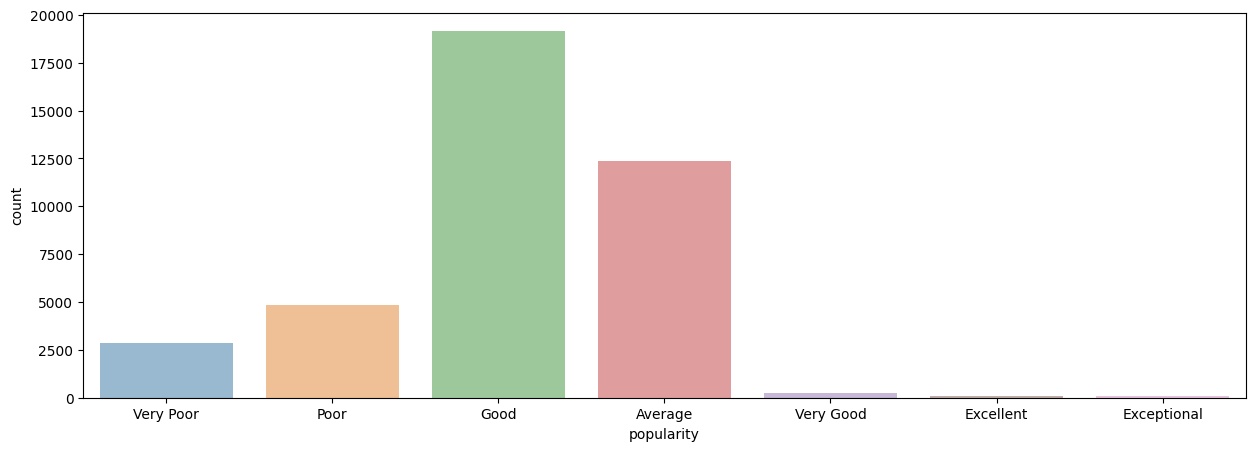

In [30]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)

In [31]:
class_counts = data.groupby('popularity').size().reset_index()
class_counts.columns = ['Popularity','No of articles']
class_counts

,Popularity,No of articles
0,Average,12381
1,Excellent,80
2,Exceptional,95
3,Good,19156
4,Poor,4852
5,Very Good,231
6,Very Poor,2849


<Axes: xlabel=' avg_positive_polarity', ylabel='shares'>

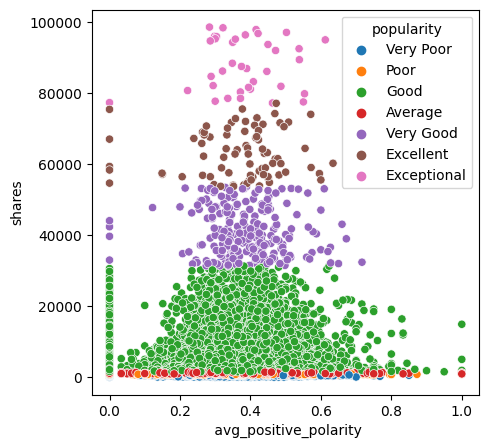

In [32]:
temp_data = data[data['shares'] <= 100000]
fig, axes = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=' avg_positive_polarity', y='shares', hue='popularity', data=temp_data, ax=axes)

<Axes: xlabel=' self_reference_min_shares', ylabel='shares'>

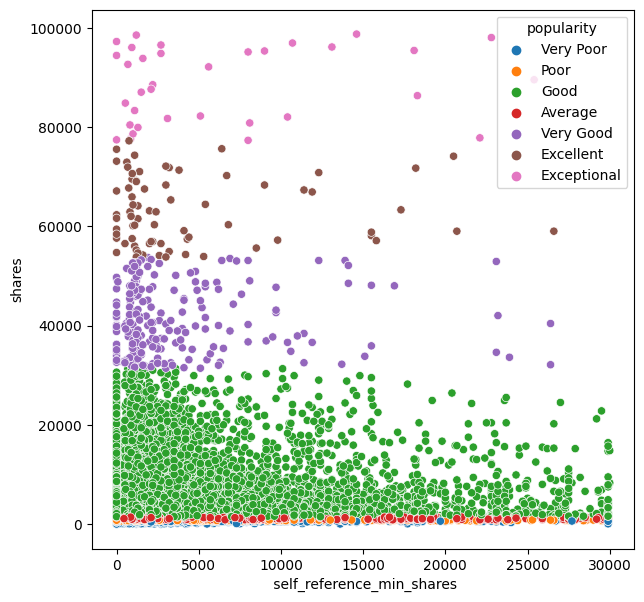

In [33]:
temp_data = data[(data['shares'] <= 100000) & (data[' self_reference_min_shares'] <= 30000)]
fig, axes = plt.subplots(figsize=(7, 7))
sns.scatterplot(x=' self_reference_min_shares', y='shares', hue= 'popularity', data=temp_data, ax=axes)

<Axes: xlabel=' title_sentiment_polarity', ylabel='shares'>

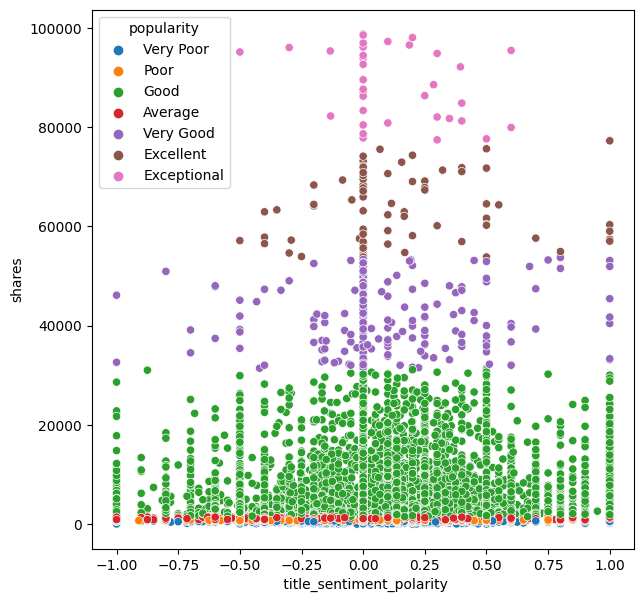

In [34]:
temp_data = data[data['shares'] <= 100000]
fig, axes = plt.subplots(figsize=(7,7))
sns.scatterplot(x=' title_sentiment_polarity', y='shares', hue='popularity', data=temp_data, ax=axes)

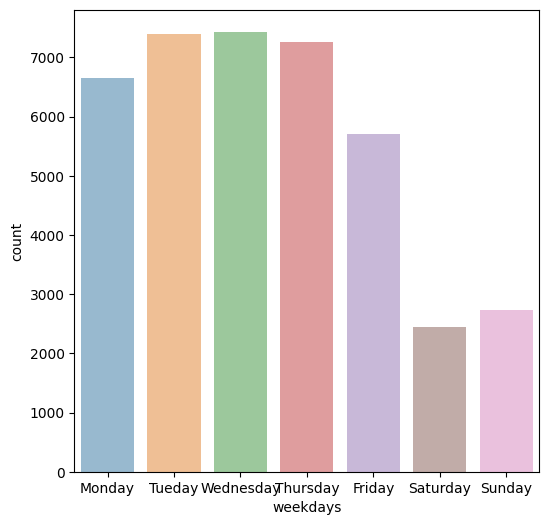

In [35]:
fig, axes = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='weekdays',data=data,alpha=0.5, ax=axes)

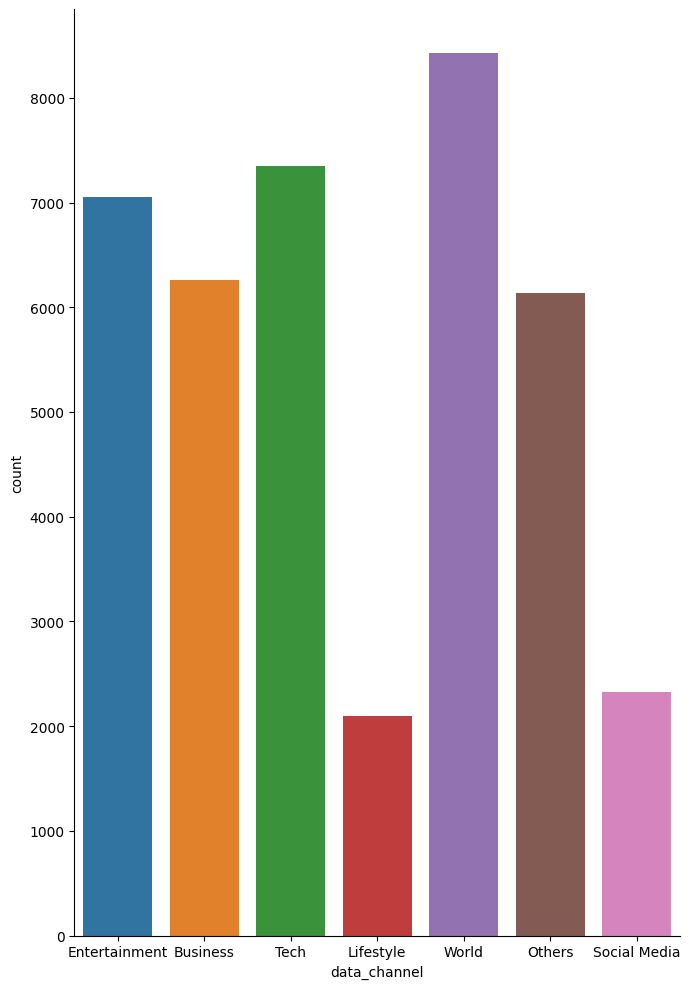

In [36]:
sns.catplot(x='data_channel', data=data, kind="count", height=10, aspect=.7)

<Axes: xlabel=' num_hrefs', ylabel='shares'>

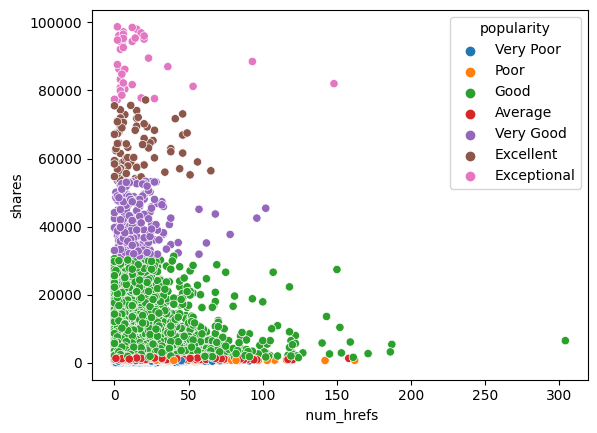

In [37]:
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x=' num_hrefs',y='shares', hue='popularity', data=temp_data)

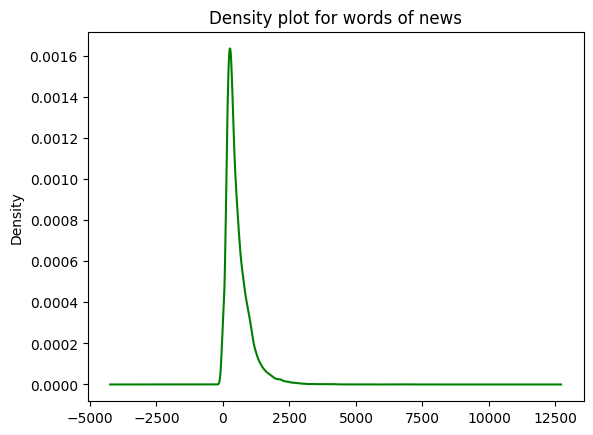

In [38]:
df[' n_tokens_content'].plot.density(color='green')
plt.title('Density plot for words of news')
plt.show()

<Axes: xlabel=' n_tokens_content', ylabel='shares'>

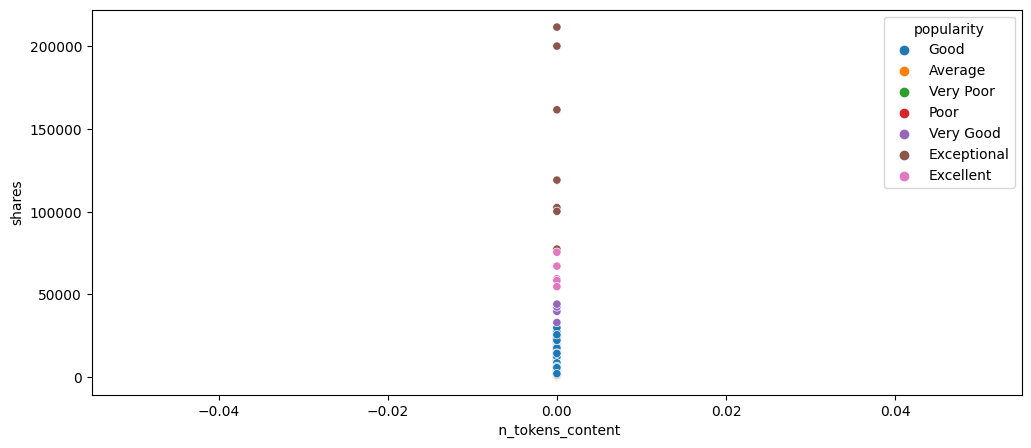

In [39]:
temp_data = data[data[' n_tokens_content'] <= 10]
fig, axes = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=' n_tokens_content', y='shares', hue='popularity', data=temp_data, ax=axes)

In [42]:
df.value_counts(' n_tokens_content')

 n_tokens_content
0.0       1181
286.0      101
335.0       86
225.0       86
279.0       85
          ... 
2089.0       1
2090.0       1
2093.0       1
2097.0       1
8474.0       1
Length: 2406, dtype: int64

In [44]:
df.drop(df[(df[' n_tokens_content'] < 10)].index, inplace=True)


In [45]:
df = df.reset_index()

In [46]:
test = df.copy()

In [47]:
Q1 = test.quantile(0.05)
Q3 = test.quantile(0.95)
IQR = Q3 - Q1

test = test[~((test < (Q1 - 1.5 * IQR)) |(test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [48]:
df = test

In [49]:
df.drop('index', axis = 1, inplace = True)

In [50]:
df['shares'] = np.log2(df['shares'])

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
  
X = df.drop(columns=['shares'])
y = df['shares']
  
  
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.2)

model = Ridge(alpha = 0.5, tol = 0.001, solver ='auto', random_state = 42)
model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)
  
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.15143581508108495


In [67]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.233985584591798

In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
  
X = df.drop(columns=['shares'])
y = df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size = 0.3)
  
model = Lasso(alpha = 0.5, tol = 0.001,  random_state = 42)
model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)
  
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.1006748557304381


In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.3143833268081087

In [70]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
  
X = df.drop(columns=['shares'])
y = df['shares']
  
  
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y.values, test_size = 0.2)

model = Ridge(alpha = 0.5, tol = 0.001, solver ='auto', random_state = 42)
model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)
  
score = model.score(X_test, y_test)
print("\n\nModel score : ", score)



Model score :  0.16424020430259656


In [79]:
b_f , _, _ = backward_selection(X_train, y_train)

In [80]:
f_f , _, _ = forward_selection(X_train, y_train)

In [81]:
print(b_f)
print(f_f)

[]
[26, 16, 18, 15, 27, 37, 8, 38, 57, 11, 32, 42, 9, 14, 23, 19, 1, 43, 4, 3, 52, 54, 46, 22, 12, 24, 25, 53, 49, 50, 51, 45, 2, 5, 10, 33, 6, 44, 41, 28, 29, 7, 17, 0, 31, 48, 47, 35, 55, 30, 20, 39, 58, 21, 56, 13, 34, 36, 40]


In [82]:
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
for i in df.columns:
  if lilliefors(df['shares'])[1] >= 0.01:
    print(i + ' : accepted')
  else:
    print(i + ' : rejected')


level_0 : rejected
 n_tokens_title : rejected
 n_tokens_content : rejected
 n_unique_tokens : rejected
 n_non_stop_words : rejected
 n_non_stop_unique_tokens : rejected
 num_hrefs : rejected
 num_self_hrefs : rejected
 num_imgs : rejected
 num_videos : rejected
 average_token_length : rejected
 num_keywords : rejected
 data_channel_is_lifestyle : rejected
 data_channel_is_entertainment : rejected
 data_channel_is_bus : rejected
 data_channel_is_socmed : rejected
 data_channel_is_tech : rejected
 data_channel_is_world : rejected
 kw_min_min : rejected
 kw_max_min : rejected
 kw_avg_min : rejected
 kw_min_max : rejected
 kw_max_max : rejected
 kw_avg_max : rejected
 kw_min_avg : rejected
 kw_max_avg : rejected
 kw_avg_avg : rejected
 self_reference_min_shares : rejected
 self_reference_max_shares : rejected
 self_reference_avg_sharess : rejected
 weekday_is_monday : rejected
 weekday_is_tuesday : rejected
 weekday_is_wednesday : rejected
 weekday_is_thursday : rejected
 weekday_is_friday

In [83]:
from scipy.stats import kstest, norm
for i in df.columns:
  ks_statistic, p_value = kstest(df[i], 'norm')
  if p_value >= 0.01:
    print(i + ' : accepted')
  else:
    print(i + ' : rejected')


level_0 : rejected
 n_tokens_title : rejected
 n_tokens_content : rejected
 n_unique_tokens : rejected
 n_non_stop_words : rejected
 n_non_stop_unique_tokens : rejected
 num_hrefs : rejected
 num_self_hrefs : rejected
 num_imgs : rejected
 num_videos : rejected
 average_token_length : rejected
 num_keywords : rejected
 data_channel_is_lifestyle : rejected
 data_channel_is_entertainment : rejected
 data_channel_is_bus : rejected
 data_channel_is_socmed : rejected
 data_channel_is_tech : rejected
 data_channel_is_world : rejected
 kw_min_min : rejected
 kw_max_min : rejected
 kw_avg_min : rejected
 kw_min_max : rejected
 kw_max_max : rejected
 kw_avg_max : rejected
 kw_min_avg : rejected
 kw_max_avg : rejected
 kw_avg_avg : rejected
 self_reference_min_shares : rejected
 self_reference_max_shares : rejected
 self_reference_avg_sharess : rejected
 weekday_is_monday : rejected
 weekday_is_tuesday : rejected
 weekday_is_wednesday : rejected
 weekday_is_thursday : rejected
 weekday_is_friday

In [84]:
from scipy import stats
corr_coeff, p_value = stats.pearsonr(df[' n_tokens_title'], df[' n_tokens_content'])
print("Pearson's correlation coefficient test:")
if p_value < corr_coeff:
  print('rejected')
else:
  print('accepted')

Pearson's correlation coefficient test:
rejected


#Question13

In [92]:
df = pd.read_csv('/content/penguins.csv')

In [93]:
df.dropna(inplace=True)

In [94]:
df = df.reset_index()

In [95]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...,...
328,338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
329,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
330,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
331,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


In [97]:
df.value_counts('species')

species
Adelie       146
Gentoo       119
Chinstrap     68
dtype: int64

In [103]:
df = pd.get_dummies(df, columns = ['species', 'island'])

In [104]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop(columns=['sex'])
y = df['sex']

In [105]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_loss(X, y, W):
    num_samples = X.shape[0]
    scores = X.dot(W)
    probabilities = softmax(scores)
    loss = -np.sum(np.log(probabilities[range(num_samples), y])) / num_samples
    return loss

def compute_gradient(X, y, W):
    num_samples = X.shape[0]
    scores = X.dot(W)
    probabilities = softmax(scores)
    grad = probabilities
    grad[range(num_samples), y] -= 1
    grad /= num_samples
    grad = X.T.dot(grad)
    return grad

def batch_gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate, num_iterations):
    num_features = X_train.shape[1]
    num_classes = len(np.unique(y_train))
    W = np.random.randn(num_features, num_classes) * 0.01
    best_loss = float('inf')
    best_W = None
    train_losses = []
    val_losses = []
    
    for i in range(num_iterations):
        grad = compute_gradient(X_train, y_train, W)
        W -= learning_rate * grad
        train_loss = compute_loss(X_train, y_train, W)
        val_loss = compute_loss(X_val, y_val, W)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_W = W
        else:
            break
            
    return best_W, train_losses, val_losses

In [110]:
learning_rate = 0.1
num_iterations = 1000
best_W, train_losses, val_losses = batch_gradient_descent_with_early_stopping(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

scores = X_test.dot(best_W)
y_pred = np.argmax(scores, axis=1)

accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy:", accuracy)

Accuracy: 89.55223880597015
